In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import cv2


In [2]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [3]:
path = './test_data'
data_folder = Path(path)
images = []
images_gray = []
for i in range(1,5):
    filename = 'screen' + str(i) + '.png'
    img_file = data_folder/filename
    if not img_file.exists():
        filename = 'screen' + str(i) + '.jpg'
        img_file = data_folder/filename
    img = io.imread(img_file, as_gray=False)
    images.append(img)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    images_gray.append(img_gray)
 

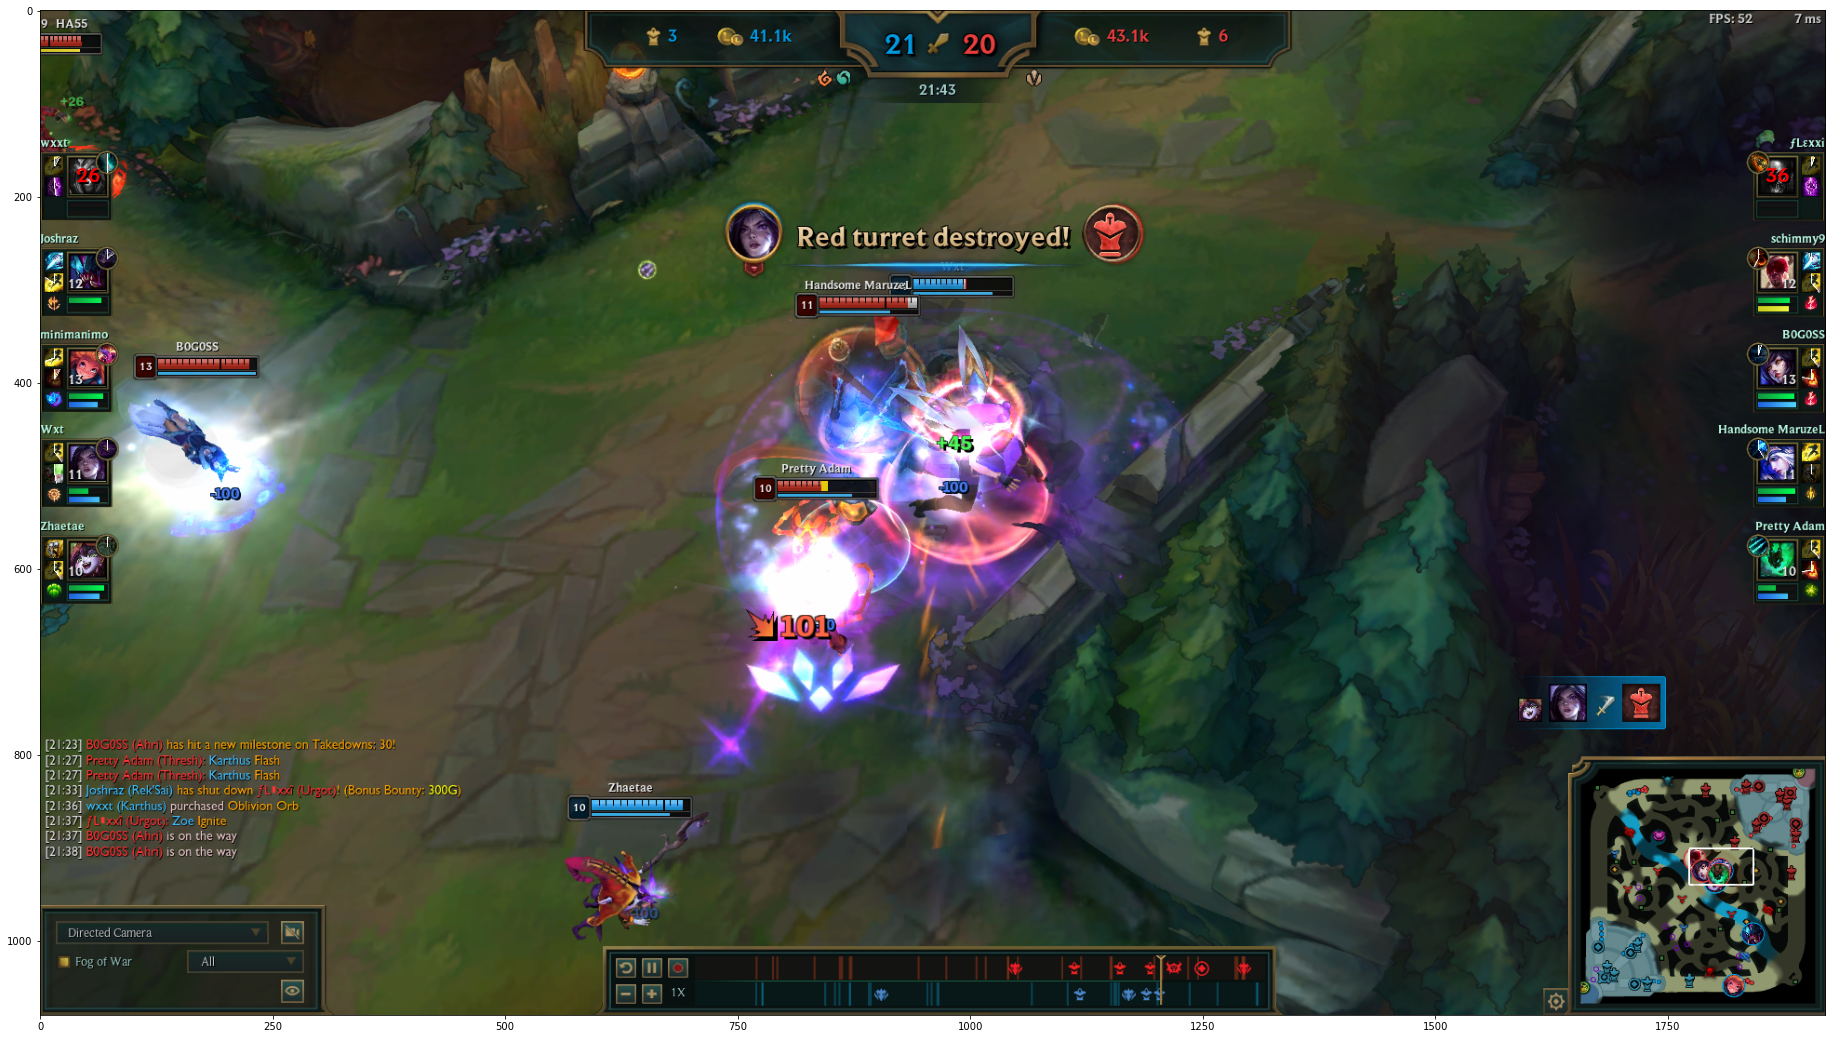

In [4]:
plt.figure(figsize=(32,32))
# plt.title('Absolute value sobely of original image. Kernel size = ' + str(kernel_size_sobely)), plt.xticks([]), plt.yticks([])
plt.imshow(images[1])

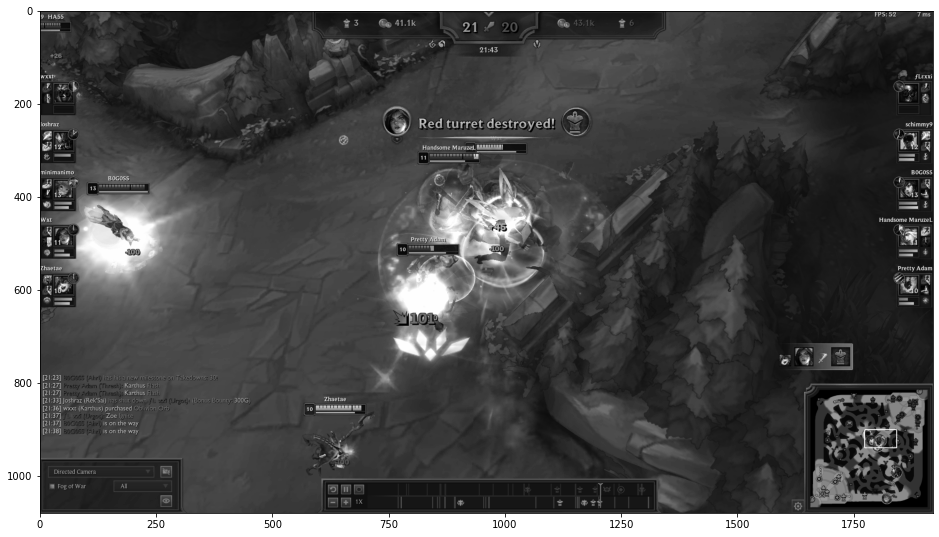

In [5]:
plt.figure(figsize=(16,16))
plt.imshow(images_gray[1], cmap='gray')

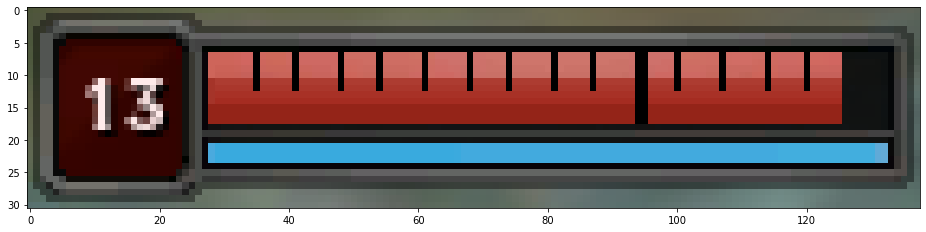

In [6]:
plt.figure(figsize=(16,16))
health_bar1 = images[1][368:399, 99:237]
plt.imshow(health_bar1)

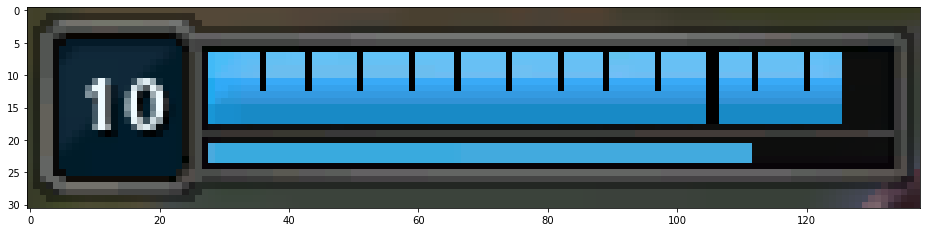

In [7]:
plt.figure(figsize=(16,16))
health_bar2 = images[1][842:873, 565:703]
plt.imshow(health_bar2)

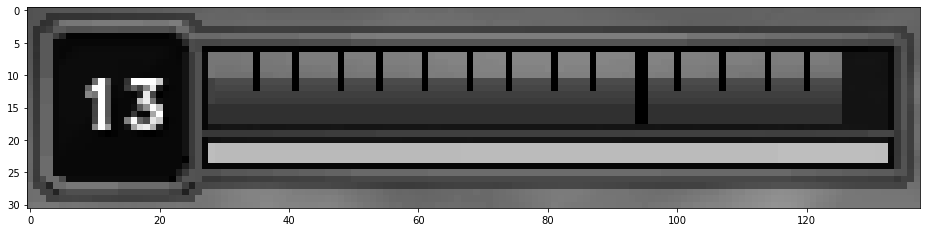

In [8]:
plt.figure(figsize=(16,16))
health_bar1_gray = images_gray[1][368:399, 99:237]
plt.imshow(health_bar1_gray, cmap='gray')

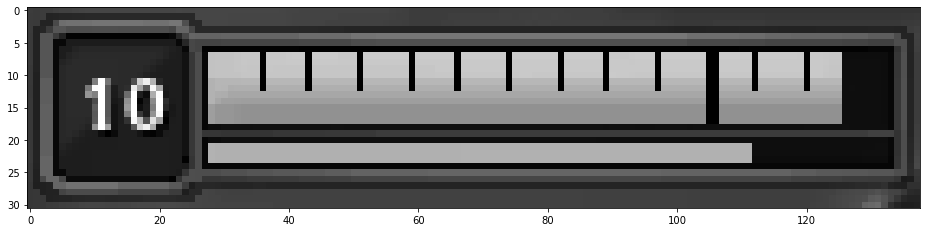

In [9]:
plt.figure(figsize=(16,16))
health_bar2_gray = images_gray[1][842:873, 565:703]
plt.imshow(health_bar2_gray, cmap='gray')

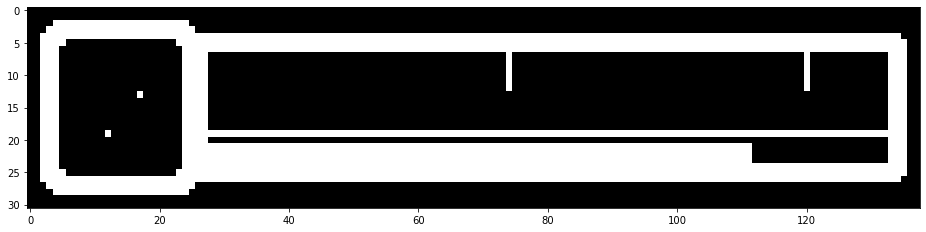

In [10]:
plt.figure(figsize=(16,16))
bar_gray = np.where(health_bar1_gray == health_bar2_gray, 255, 0)
plt.imshow(bar_gray, cmap='gray')

In [11]:
bar_gray = bar_gray[2:-2, 2:-2]
for i in range(bar_gray.shape[0]//2):
    for j in range(1, bar_gray.shape[1]-1):
        if bar_gray[i, j] != bar_gray[i, j-1] and bar_gray[i, j] != bar_gray[i, j+1]:
            bar_gray[i, j] = 0
        
        if bar_gray[i, j] != bar_gray[-(i+1), j]:
            bar_gray[i, j] = 0
            bar_gray[-(i+1), j] = 0

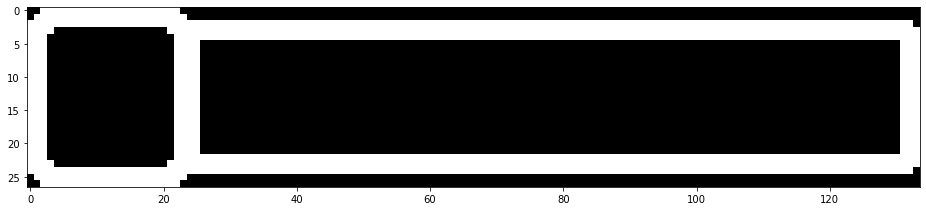

In [12]:
plt.figure(figsize=(16,16))
plt.imshow(bar_gray, cmap='gray')

In [13]:
margin = 4
bar_gray_horiz = np.zeros(bar_gray.shape)
pixels_horiz = []
for i in range(bar_gray.shape[0]):
    for j in range(bar_gray.shape[1]):
        if bar_gray[i, j] == 255:
            if np.sum(bar_gray[i, max(0, j-margin):j]) == margin * 255 or np.sum(bar_gray[i, j+1:min(bar_gray.shape[1]-1, j+margin+1)]) == margin * 255:
                bar_gray_horiz[i, j] = 255
                pixels_horiz.append((i, j))

In [14]:
with open('./data/pixels_horiz.txt', 'w') as f:
        for item in pixels_horiz:
            f.write("%d %d\n" % (item[0], item[1]))

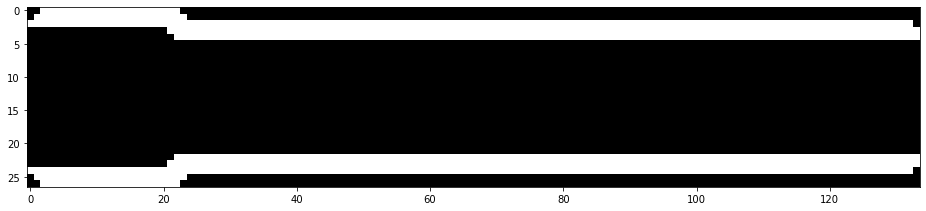

In [15]:
plt.figure(figsize=(16,16))
plt.imshow(bar_gray_horiz, cmap='gray')

In [16]:
margin = 4
bar_gray_vert = np.zeros(bar_gray.shape)
pixels_vert = []
for i in range(bar_gray.shape[0]):
    for j in range(bar_gray.shape[1]):
        if bar_gray[i, j] == 255:
            if np.sum(bar_gray[max(0, i-margin):i, j]) == margin * 255 or np.sum(bar_gray[i+1:min(bar_gray.shape[0]-1, i + margin + 1), j]) == margin * 255:
                bar_gray_vert[i, j] = 255
bar_gray_vert[:,21:30] = 0
for i in range(bar_gray_vert.shape[0]):
    for j in range(bar_gray_vert.shape[1]):
        if bar_gray_vert[i, j] == 255:
            pixels_vert.append((i, j))


In [17]:
with open('./data/pixels_vert.txt', 'w') as f:
        for item in pixels_vert:
            f.write("%d %d\n" % (item[0], item[1]))

In [80]:
len(pixels_vert)

142

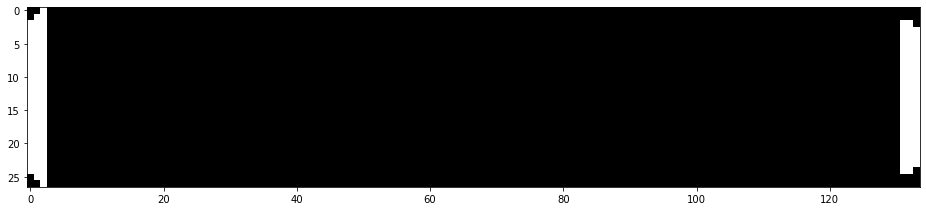

In [18]:
plt.figure(figsize=(16,16))
plt.imshow(bar_gray_vert, cmap='gray')

True

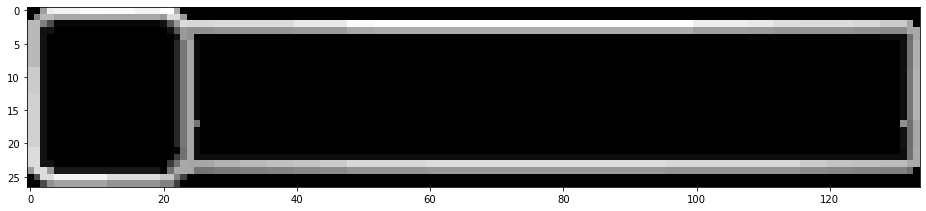

In [19]:
bar_edges = np.where(bar_gray == 255, health_bar1_gray[2:-2, 2:-2] , 0)
plt.figure(figsize=(16,16))
plt.imshow(bar_edges, cmap='gray')

cv2.imwrite('perfect_bar.png', bar_edges) 

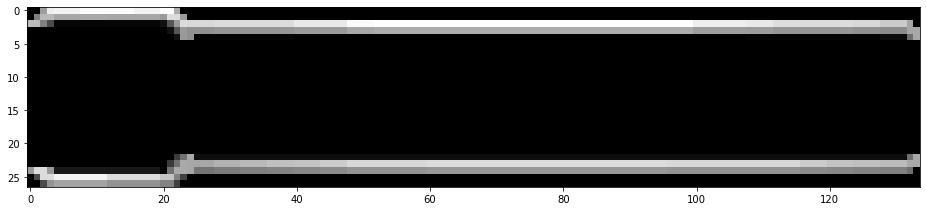

In [20]:
bar_edges_horiz = np.where(bar_gray_horiz == 255, health_bar1_gray[2:-2, 2:-2] , 0)
plt.figure(figsize=(16,16))
plt.imshow(bar_edges_horiz, cmap='gray')

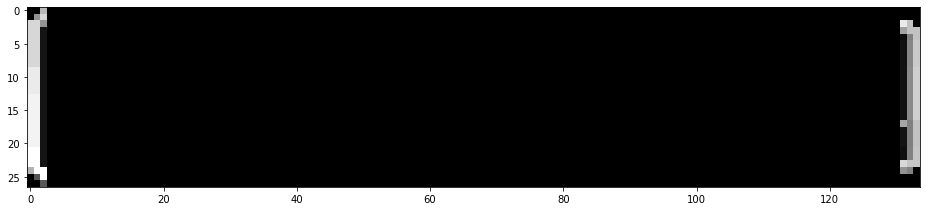

In [21]:
bar_edges_vert = np.where(bar_gray_vert == 255, health_bar1_gray[2:-2, 2:-2] , 0)
plt.figure(figsize=(16,16))
plt.imshow(bar_edges_vert, cmap='gray')

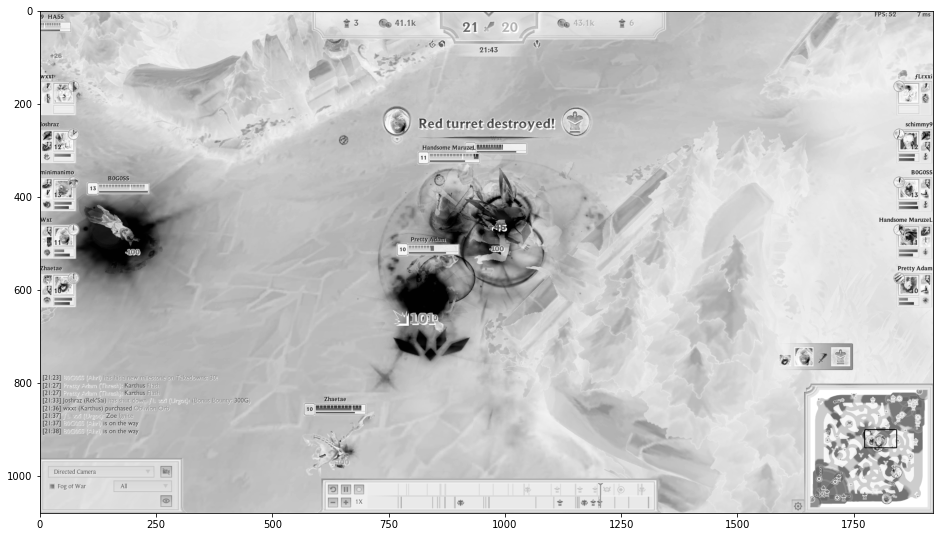

In [22]:
neg_images_gray = cv2.bitwise_not(images_gray[1])
plt.figure(figsize=(16,16))
plt.imshow(neg_images_gray, cmap='gray')

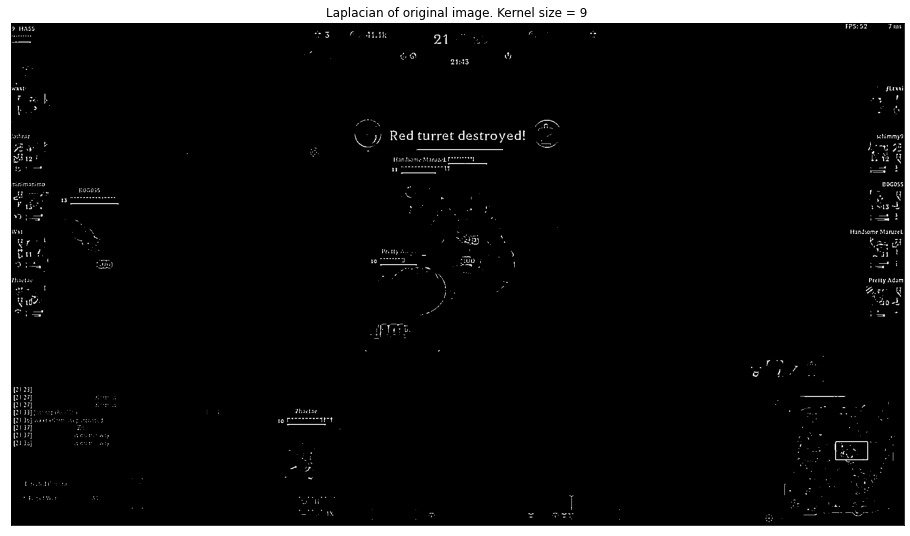

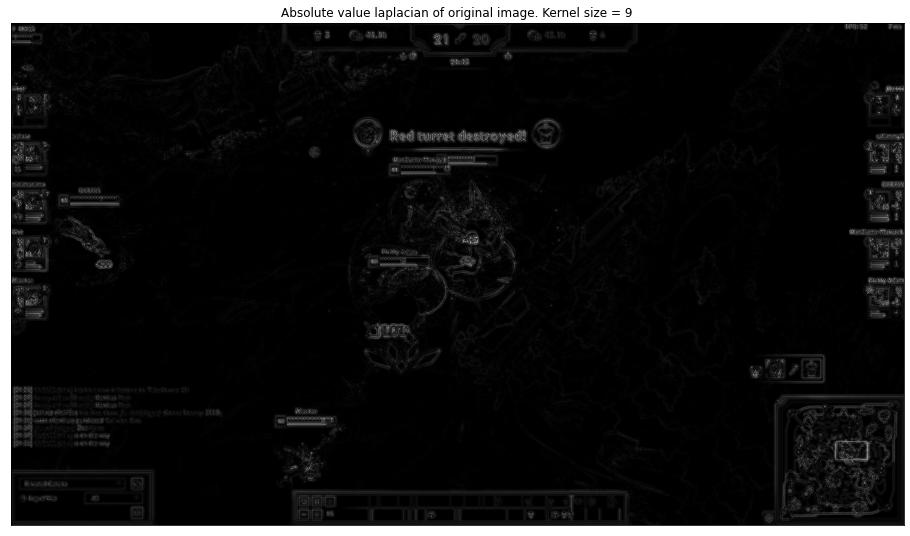

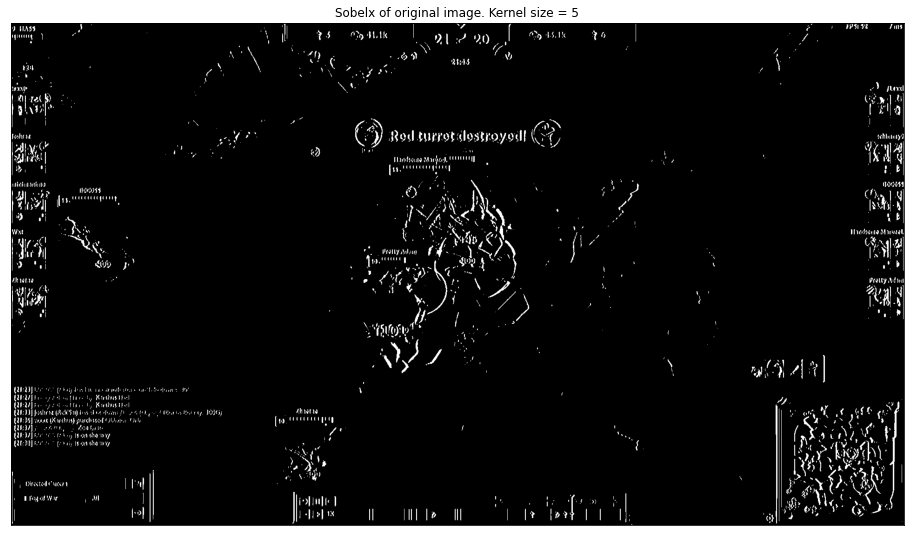

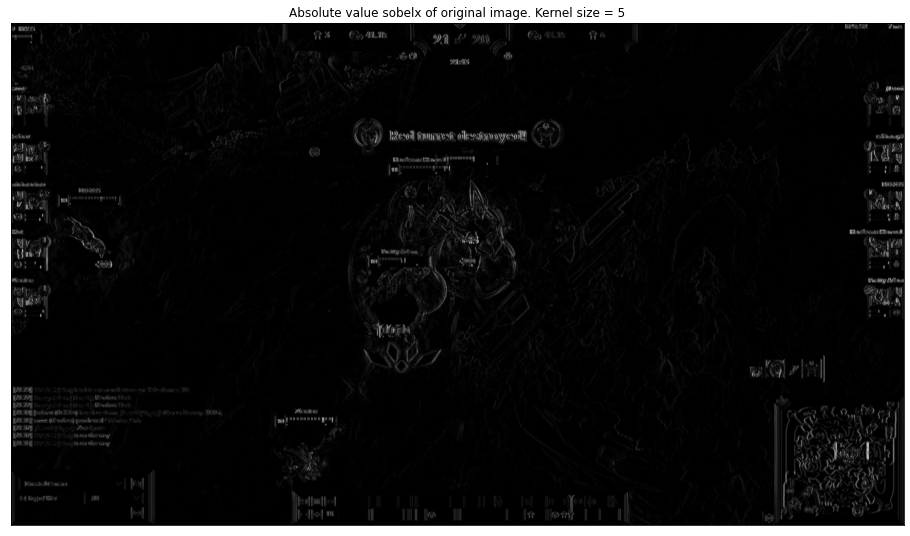

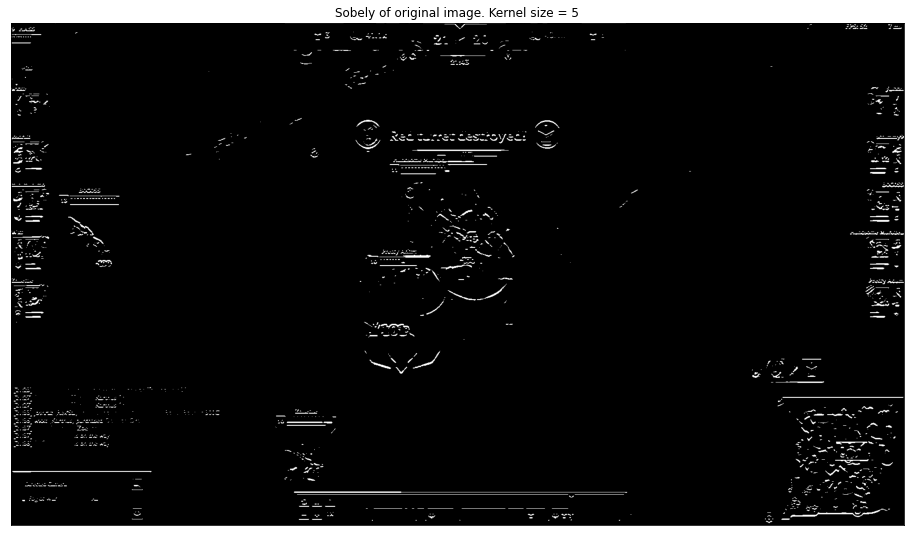

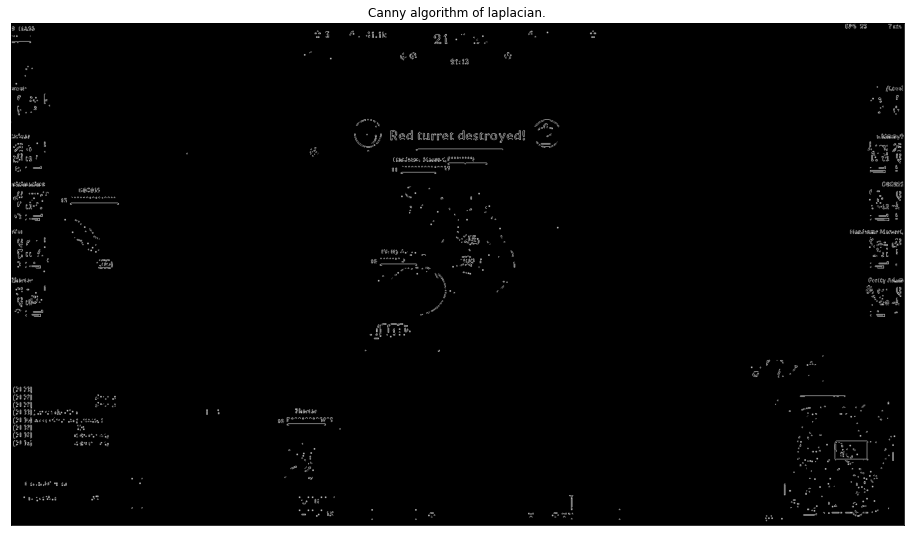

In [23]:
kernel_size_laplacian = 9
kernel_size_sobelx = 5
kernel_size_sobely = 5
img = cv2.bitwise_not(images_gray[1])
#laplacian
laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize = kernel_size_laplacian)
laplacian = ((laplacian - laplacian.min()) * (1/(laplacian.max() - laplacian.min()) * 255))
laplacian = np.clip(laplacian - 128, 0, 255)#.astype('uint8')
laplacian = np.where(laplacian>40,255,0).astype('uint8')

plt.figure(figsize=(16,16))
plt.title('Laplacian of original image. Kernel size = ' + str(kernel_size_laplacian)), plt.xticks([]), plt.yticks([])
plt.imshow(laplacian, cmap='gray')

#laplacian abs
laplacian_abs = cv2.Laplacian(img ,cv2.CV_64F, ksize = kernel_size_laplacian)
laplacian_abs = np.absolute(laplacian_abs)
laplacian_abs = ((laplacian_abs - laplacian_abs.min()) *
                 (1/(laplacian_abs.max() - laplacian_abs.min()) * 255)).astype('uint8')

plt.figure(figsize=(16,16))
plt.title('Absolute value laplacian of original image. Kernel size = ' + str(kernel_size_laplacian)), plt.xticks([]), plt.yticks([])
plt.imshow(laplacian_abs, cmap='gray')

#sobelx
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=kernel_size_sobelx)
sobelx = ((sobelx - sobelx.min()) * (1/(sobelx.max() - sobelx.min()) * 255))
sobelx = np.clip(sobelx - 128, 0, 255).astype('uint8')
sobelx = np.where(sobelx>10,255,0).astype('uint8')
plt.figure(figsize=(16,16))
plt.title('Sobelx of original image. Kernel size = ' + str(kernel_size_sobelx)), plt.xticks([]), plt.yticks([])
plt.imshow(sobelx, cmap='gray')

#sobelx abs
sobelx_abs = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=kernel_size_sobelx)
sobelx_abs = np.absolute(sobelx_abs)
sobelx_abs = ((sobelx_abs - sobelx_abs.min()) * (1/(sobelx_abs.max() - sobelx_abs.min()) * 255)).astype('uint8')
plt.figure(figsize=(16,16))
plt.title('Absolute value sobelx of original image. Kernel size = ' + str(kernel_size_sobelx)), plt.xticks([]), plt.yticks([])
plt.imshow(sobelx_abs, cmap='gray')

#sobely
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=kernel_size_sobely)
sobely = ((sobely - sobely.min()) * (1/(sobely.max() - sobely.min()) * 255))
sobely = np.clip(sobely - 128, 0, 255).astype('uint8')
sobely = np.where(sobely>20,255,0).astype('uint8')
plt.figure(figsize=(16,16))
plt.title('Sobely of original image. Kernel size = ' + str(kernel_size_sobely)), plt.xticks([]), plt.yticks([])
plt.imshow(sobely, cmap='gray')

#canny
edges = cv2.Canny(laplacian, 20, 80)
edges = ((edges - edges.min()) * (1/(edges.max() - edges.min()) * 255))
edges = np.where(edges>10,255,0).astype('uint8')

plt.figure(figsize=(16,16))
plt.title('Canny algorithm of laplacian.'), plt.xticks([]), plt.yticks([])
plt.imshow(edges, cmap='gray')


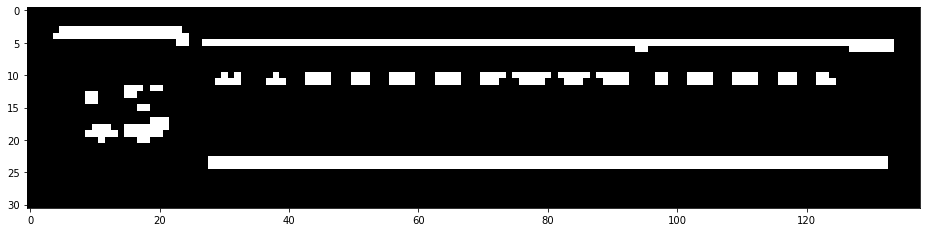

In [25]:
plt.figure(figsize=(16,16))
plt.imshow(sobely[368:399, 99:237], cmap='gray')


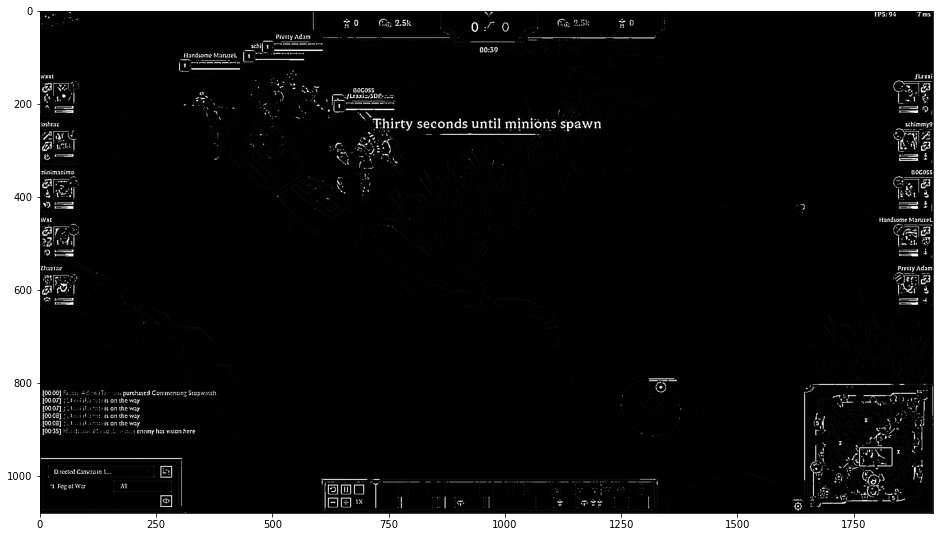

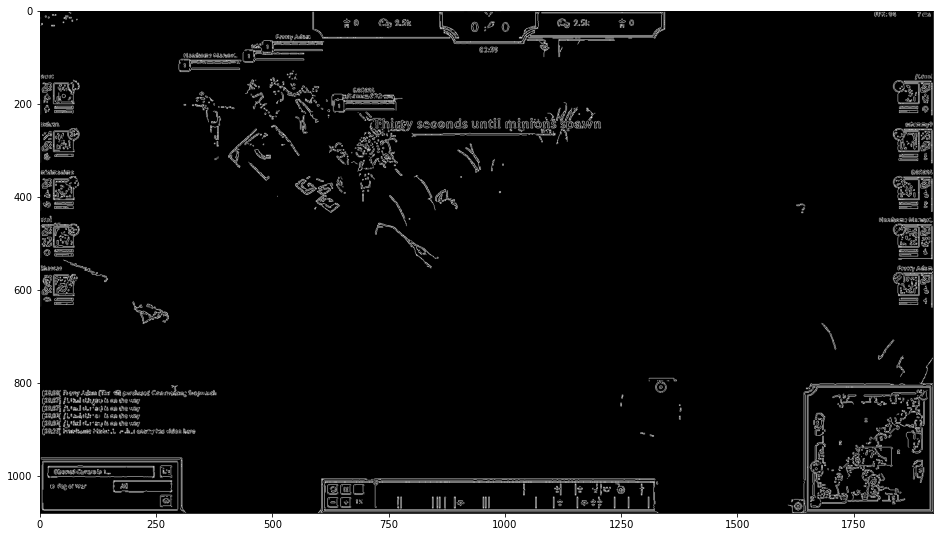

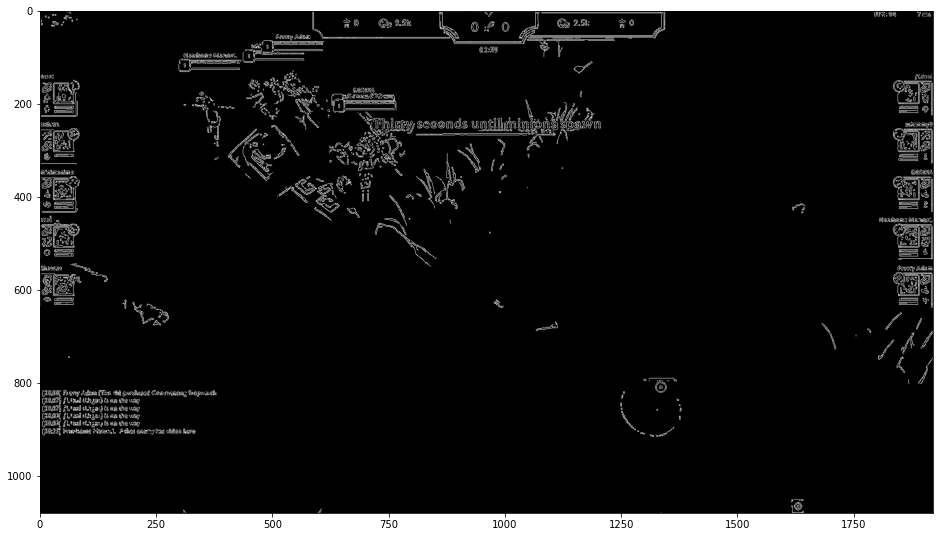

In [26]:
kernel_size_laplacian = 5
kernel_size_sobelx = 5
kernel_size_sobely = 5
minvalue = 10
maxvalue = 80
# img = images_gray[1]
img = cv2.bitwise_not(images_gray[0])
img = cv2.GaussianBlur(img,(3,3),0)
#laplacian
laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize = kernel_size_laplacian)
laplacian = ((laplacian - laplacian.min()) * (1/(laplacian.max() - laplacian.min()) * 255))
laplacian = np.clip(laplacian - 128, 0, 255)
laplacian = np.where(laplacian>21, 255, laplacian).astype('uint8')

edgesx = cv2.Canny(laplacian, 100, 0) 
edgesy = cv2.Canny(laplacian, 0, 100)
edges_sum = edgesx.astype(np.int16) + edgesx.astype(np.int16)
edges_sum = ((edges_sum - edges_sum.min()) * (1/(edges_sum.max() - edges_sum.min()) * 255))
edges_sum = np.where(edges_sum>10,255,0).astype('uint8')

edges = cv2.Canny(laplacian, minvalue, maxvalue)
edges = ((edges - edges.min()) * (1/(edges.max() - edges.min()) * 255))
edges = np.where(edges>10,255,0).astype('uint8')
edges[802:, 1642:] = np.zeros(edges[802:, 1642:].shape)
edges[960:, :308] = np.zeros(edges[960:, :308].shape)
edges[1005:,605:1335] = np.zeros(edges[1005:,605:1335].shape)

# img_gray[802:, 1642:] = np.zeros(img_gray[802:, 1642:].shape)
# img_gray[960:, :308] = np.zeros(img_gray[960:, :308].shape)
# img_gray[1005:,605:1335] = np.zeros(img_gray[1005:,605:1335].shape)
plt.figure(figsize=(16,16))
plt.imshow(laplacian, cmap='gray')

plt.figure(figsize=(16,16))
plt.imshow(edges_sum, cmap='gray')

plt.figure(figsize=(16,16))
plt.imshow(edges, cmap='gray')

In [28]:
def detect_spaces(image, offset, pixels, min_len_bright, min_len_dark,  axis):
    hist = np.sum(image, axis=axis)
    cut = np.where(hist>pixels*255, hist, 0)
    length = cut.shape[0]
    #looking for frist indicies
    x1 = np.where(cut==0)[0]
    if x1.size == 0:
        return [(0, length - 1)]
    x1_cut = np.where(np.diff(x1)>1)[0]
    first_index = x1[x1_cut]
    #looking for second indicies
    x2 = np.where(cut[::-1]==0)[0]
    x2_cut = np.where(np.diff(x2)>1)[0]
    second_index = (length - 1 -x2[x2_cut])[::-1]
    indicies = [(0, x1[0])]    
    indicies.extend(list(zip(first_index, second_index)))
    temp_index = 0
    new_indicies = []
    if len(indicies) == 1:
        new_indicies.append(indicies[0])
    else:        
        for i, (_, index2) in enumerate(indicies[:-1]):
            space = indicies[i+1][0] - index2
            if space > min_len_dark:
                new_indicies.append((max(0, indicies[temp_index][0] - offset), min(length - 1, indicies[i][1] + offset)))
                temp_index = i + 1
            elif i == len(indicies) - 2:
                new_indicies.append((max(0, indicies[temp_index][0] - offset), min(length - 1, indicies[i+1][1] + offset)))
    indicies = []
    for item in new_indicies:
        if item[1] - item[0] >= min_len_bright:
            indicies.append(item)    
    return indicies

In [29]:
print(detect_spaces(edges, offset=0, pixels=3, min_len_bright=25, min_len_dark=5, axis=0))

[(0, 1352), (1615, 1645), (1686, 1711), (1793, 1919)]


In [30]:
spaces = []
indicies = detect_spaces(edges, offset=3, pixels=3, min_len_bright=50, min_len_dark=5, axis=0)

for item in indicies:
    indicies2 = detect_spaces(edges[:, item[0]:item[1]], offset=3, pixels=3, min_len_bright=10, min_len_dark=3, axis=1)
    spaces.extend([(item2[0], item2[1], item[0], item[1]) for item2 in indicies2])
spaces2 = []

for space in spaces:
    indicies = detect_spaces(edges[space[0]:space[1], space[2]:space[3]], offset=3, pixels=3, min_len_bright=50, min_len_dark=5, axis=0)
    spaces2.extend([(space[0], space[1], space[2] + item[0], space[2] + item[1]) for item in indicies])

In [31]:
spaces

[(0, 537, 0, 1355),
 (540, 692, 0, 1355),
 (786, 919, 0, 1355),
 (0, 18, 1790, 1919),
 (134, 224, 1790, 1919),
 (236, 327, 1790, 1919),
 (339, 430, 1790, 1919),
 (441, 539, 1790, 1919),
 (545, 636, 1790, 1919),
 (649, 689, 1790, 1919),
 (689, 782, 1790, 1919),
 (785, 805, 1790, 1919)]

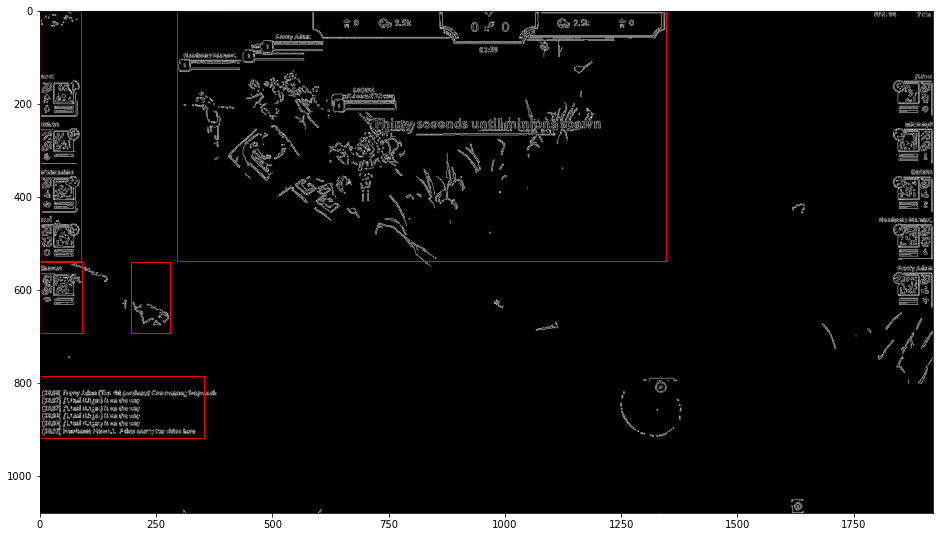

In [32]:
import matplotlib.patches as patches
fig, ax = plt.subplots(1,figsize=(16,16))
ax.imshow(edges, cmap='gray')

for space in spaces2:
    rect = patches.Rectangle((space[2], space[0]), space[3] - space[2], space[1] - space[0],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    

plt.show()

In [33]:
input_image = images_gray[0]
y, x = bar_edges.shape
minim_width = 15
minim_length = 70
pixel_threshold = 3
threshold_vert = 0.35
threshold_horiz = 0.35
poss_bars = []
for space in spaces2:
    y1 = space[0]
    y2 = space[1]
    x1 = space[2]
    x2 = space[3]
   
    if y2 - y1 < y:
        y1 = y1 - ((y - y2 + y1)//2 + 1)
        y2 = y2 + ((y - y2 + y1)//2 + 1)
        if y1 < 0:
            y2 = min(y2 + abs(y1), input_image.shape[0] - 1)
            y1 = 0
        if y2 > input_image.shape[0] - 1:
            y1 = max(y1 - abs(input_image.shape[0] - 1 - y2), 0)
            y2 = input_image.shape[0] - 1
    if x2 - x1 < x:
        x1 = x1 - ((x - x2 + x1)//2 + 1)
        x2 = x2 + ((x - x2 + x1)//2 + 1)
        if x1 < 0:
            x2 = min(x2 + abs(x1), input_image.shape[1] - 1)
            x1 = 0
        if x2 > input_image.shape[1] - 1:
            x1 = max(x1 - abs(input_image.shape[1] - 1 - x2), 0)
            x2 = input_image.shape[1] - 1
    
    image2check = input_image[y1:y2, x1:x2]
    if y1 == 0:
        temp_image = np.zeros((image2check.shape[0] + minim_width, image2check.shape[1]))    
        temp_image[minim_width:, :] = image2check
        image2check = temp_image
    if y2 == input_image.shape[0]:
        temp_image = np.zeros((image2check.shape[0] + minim_width, image2check.shape[1]))        
        temp_image[:-minim_width, :] = image2check
        image2check = temp_image
    if x1 == 0:
        temp_image = np.zeros((image2check.shape[0], image2check.shape[1] + minim_length))        
        temp_image[:, minim_length:] = image2check
        image2check = temp_image
    if x2 == input_image.shape[1]:
        temp_image = np.zeros((image2check.shape[0], image2check.shape[1] + minim_length))        
        temp_image[:, :-minim_length] = image2check
        image2check = temp_image
    for i in range(image2check.shape[0] - y):
        for j in range(image2check.shape[1] - x):
            part_image = image2check[i:i+y, j:j+x]
            if sum([1 for pixel in pixels_vert if np.abs(int(part_image[pixel]) - int(bar_edges[pixel])) <= pixel_threshold])/len(pixels_vert) >= threshold_vert:
                if sum([1 for pixel in pixels_horiz if np.abs(int(part_image[pixel]) - int(bar_edges[pixel])) <= pixel_threshold])/len(pixels_horiz) >= threshold_horiz:
                    poss_bars.append((y2 - image2check.shape[0] + i + y, x2 - image2check.shape[1] + j + x))

[(93, 611), (113, 571), (133, 433), (220, 765)]


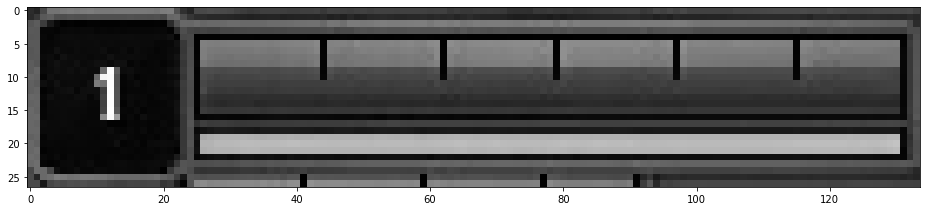

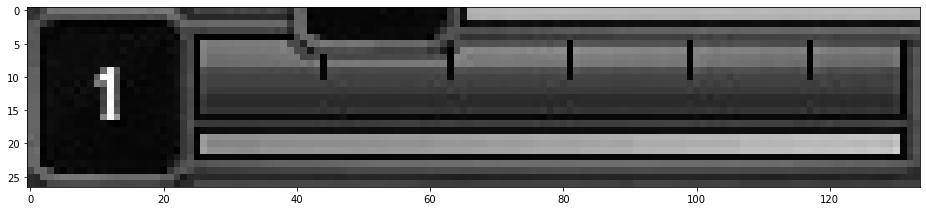

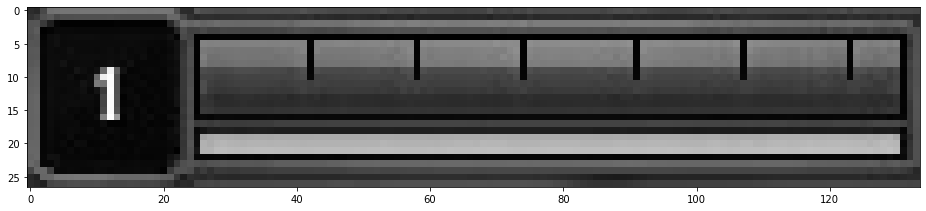

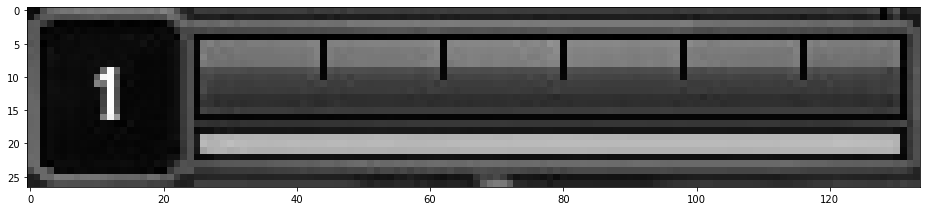

In [34]:
print(poss_bars)
for item in poss_bars:
    plt.figure(figsize=(16,16))
    plt.imshow(input_image[max(item[0]-y,0):item[0], max(item[1]-x,0):item[1]], cmap='gray')

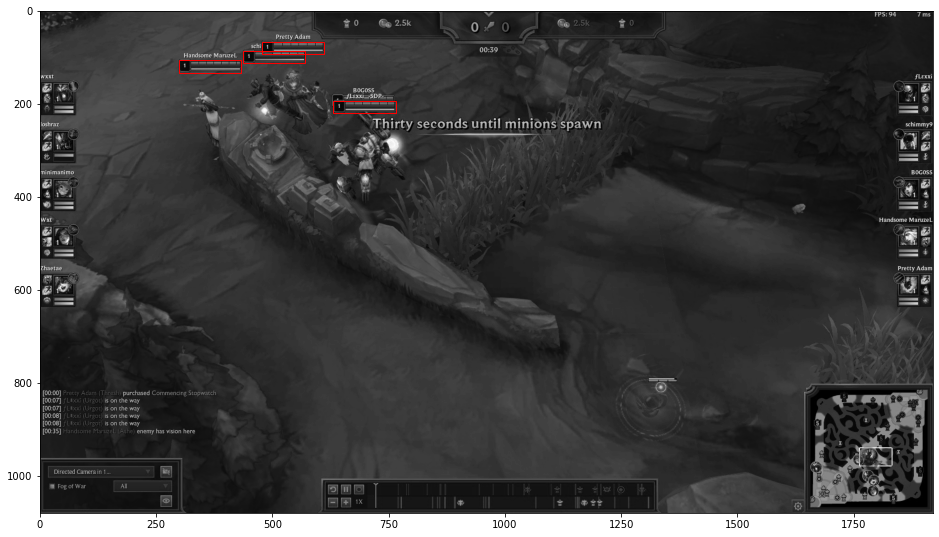

In [35]:
import matplotlib.patches as patches
fig, ax = plt.subplots(1,figsize=(16,16))
ax.imshow(input_image, cmap='gray')

for item in poss_bars:
    rect = patches.Rectangle((max(item[1]-x,0), max(item[0]-y,0)), item[1] - max(item[1]-x,0), item[0] - max(item[0]-y,0),linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
plt.show()